In [ ]:
#DATA PREPARATION
#This data was collected from a completed course evaluation by students of a university in North India and is available on Kaggle. 
#The dataset is organized into 6 categories: teaching, course content, examination, lab work, library facilities and extracurricular activities. 
#The dataset had been labelled into 3 categories: +1 which represents positive, 0 which is for neutral and -1 which indicates negative.

In [1]:
import pandas as pd

df = pd.read_excel (r'C:\Users\izzie\PycharmProjects\Capstone\finalDataset0.2.xlsx')
df.head ()

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


In [2]:
df.size

2220

In [3]:
from sklearn.model_selection import train_test_split


Text = []
Label = []
for i in range(0, len(df.columns)-1, 2):
  Label.extend(df.iloc[:, i].values)
  Text.extend(df.iloc[:, i+1].values)
rs_dt = pd.DataFrame({"Text":Text, "Label":Label})

In [4]:
rs_dt.dropna(inplace=True)

In [5]:
rs_dt.size

2210

In [6]:
X_train, X_test, y_train, y_test = train_test_split(rs_dt['Text'], rs_dt['Label'], random_state=1)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions, average='weighted'))
print('Recall score: ', recall_score(y_test, predictions, average='weighted'))

Accuracy score:  0.7833935018050542
Precision score:  0.7650040521623811
Recall score:  0.7833935018050542


Text(0.5, 15.0, 'predicted label')

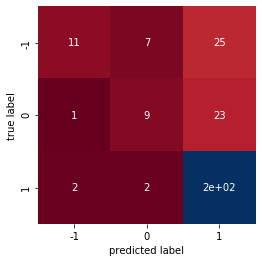

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.ylabel('true label')
plt.xlabel('predicted label')

In [62]:
y_test.value_counts()

 1.0    201
-1.0     43
 0.0     33
Name: Label, dtype: int64

In [ ]:
#Split the data into training and testing datasets.

In [ ]:
def splitDataset(dataset, splitRatio):
  trainSize = int(len(dataset) * splitRatio)
  trainSet = []
  copy = list(dataset)
  while len(trainSet) < trainSize:
    index = random.randrange(len(copy))
    trainSet.append(copy.pop(index))
  return [trainSet, copy]

In [ ]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [ ]:
def mean(numbers):
    return sum(numbers) / float(len(numbers))

In [ ]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
    return math.sqrt(variance)

In [ ]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [ ]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

In [ ]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math.pi)*stdev))*exponent

In [ ]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

In [ ]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [ ]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [ ]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(testSet))) * 100.0

In [37]:
import pandas as pd
df =  pd.read_excel (r'C:\Users\izzie\PycharmProjects\Capstone\finaldataset0.2.xlsx')
def main():
    filename = 'finalDataset0.2.xlsx'
    splitRatio = 0.67
    dataset = df
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print(('Split {0} rows into train={1} and test={2} rows').format(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print(('Accuracy: {0}%').format(accuracy))


main()

NameError: name 'splitDataset' is not defined

In [36]:
rs_dt['Label'].value_counts()

 1.0    808
 0.0    150
-1.0    147
Name: Label, dtype: int64

Text(0, 0.5, 'Frequency')

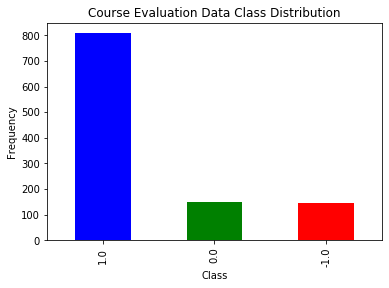

In [35]:
rs_dt['Label'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title("Course Evaluation Data Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")